In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics.pairwise import euclidean_distances
from PIL import Image
import scipy.cluster.vq as vq


In [14]:
# Define the proposed kernel function
def k(x, x_prime):
    """Proposed kernel: k(x, x') = x_1 + x_2"""
    return x[0] + x[1]  # Note: this doesn't depend on x'!

# Define test points
x1 = np.array([1, 0])
x2 = np.array([0, 1])
x3 = np.array([0, 0])
points = [x1, x2, x3]

# Construct Gram matrix
n = len(points)
K = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        K[i, j] = k(points[i], points[j])

print("Gram matrix K:")
print(K)
print(f"\nNote: k(x, x') = x_1 + x_2 doesn't depend on x', which is already suspicious!")

# Check eigenvalues
eigenvalues = np.linalg.eigvals(K)
print(f"\nEigenvalues of K: {eigenvalues}")
print(f"All eigenvalues non-negative? {all(eigenvalues >= -1e-10)}")  # Allow small numerical errors

# Conclusion
print(f"\nConclusion: k(x, x') = x_1 + x_2 is NOT a valid kernel because:")
print("1. It doesn't depend on x' at all")
print("2. A kernel must be a function of both arguments")
print("3. The 'kernel' k(x, x') = x_1 + x_2 is not even symmetric: k(x, x') ≠ k(x', x)")


Gram matrix K:
[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]]

Note: k(x, x') = x_1 + x_2 doesn't depend on x', which is already suspicious!

Eigenvalues of K: [2. 0. 0.]
All eigenvalues non-negative? True

Conclusion: k(x, x') = x_1 + x_2 is NOT a valid kernel because:
1. It doesn't depend on x' at all
2. A kernel must be a function of both arguments
3. The 'kernel' k(x, x') = x_1 + x_2 is not even symmetric: k(x, x') ≠ k(x', x)


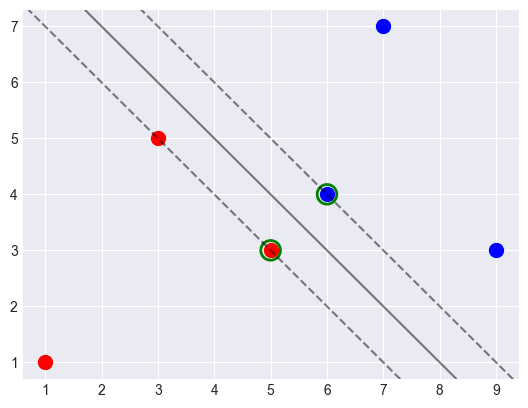

Support Vectors:
[[5. 3.]
 [6. 4.]]

Decision boundary: 1.000*x1 + 1.000*x2 + -9.000 = 0


In [15]:
class_neg = np.array([[1, 1], [3, 5], [5, 3]])
class_pos = np.array([[6, 4], [7, 7], [9, 3]])

X = np.vstack([class_neg, class_pos])
y = np.array([-1, -1, -1, 1, 1, 1])

clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(class_neg[:, 0], class_neg[:, 1], c='red', s=100)
plt.scatter(class_pos[:, 0], class_pos[:, 1], c='blue', s=100)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=200, facecolors='none', edgecolors='green', linewidth=2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.show()

print("Support Vectors:")
print(clf.support_vectors_)
print(f"\nDecision boundary: {clf.coef_[0][0]:.3f}*x1 + {clf.coef_[0][1]:.3f}*x2 + {clf.intercept_[0]:.3f} = 0")


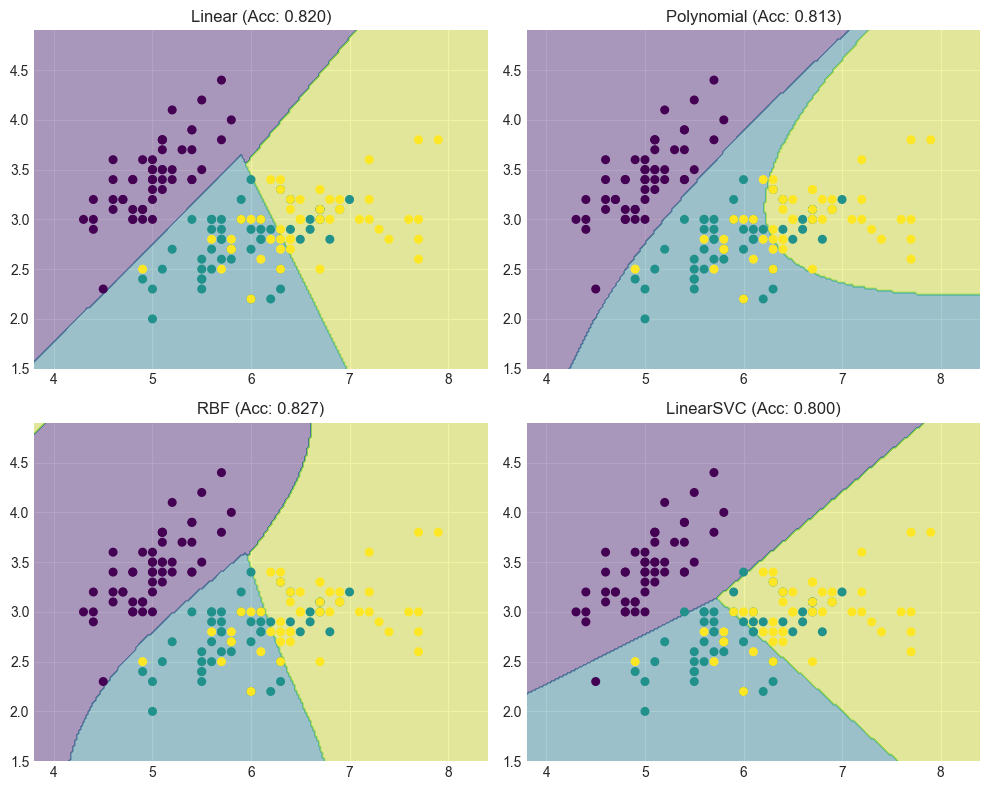

Best separation: RBF SVM with gamma=0.7


In [16]:
iris = datasets.load_iris()
X_iris = iris.data[:, :2]
y_iris = iris.target

classifiers = [
    ('Linear', SVC(kernel='linear', C=1)),
    ('Polynomial', SVC(kernel='poly', degree=3, gamma='auto', C=1)),
    ('RBF', SVC(kernel='rbf', gamma=0.7, C=1)),
    ('LinearSVC', LinearSVC(max_iter=10000, C=1))
]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

h = 0.02
x_min, x_max = X_iris[:, 0].min() - 0.5, X_iris[:, 0].max() + 0.5
y_min, y_max = X_iris[:, 1].min() - 0.5, X_iris[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for idx, (name, clf) in enumerate(classifiers):
    clf.fit(X_iris, y_iris)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    axes[idx].scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', s=30)
    axes[idx].set_title(f'{name} (Acc: {clf.score(X_iris, y_iris):.3f})')

plt.tight_layout()
plt.show()

print("Best separation: RBF SVM with gamma=0.7")


In [17]:
points = np.array([
    [1, 1],
    [1.5, 1.5],
    [3, 3],
    [4, 4],
    [4, 4.5],
    [7, 6],
    [7.5, 7]
])

point_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

distance_matrix = euclidean_distances(points, points)

print("Distance Matrix:")
for i in range(len(points)):
    print(f"{point_labels[i]}: " + " ".join(f"{distance_matrix[i, j]:.2f}" for j in range(len(points))))


Distance Matrix:
A: 0.00 0.71 2.83 4.24 4.61 7.81 8.85
B: 0.71 0.00 2.12 3.54 3.91 7.11 8.14
C: 2.83 2.12 0.00 1.41 1.80 5.00 6.02
D: 4.24 3.54 1.41 0.00 0.50 3.61 4.61
E: 4.61 3.91 1.80 0.50 0.00 3.35 4.30
F: 7.81 7.11 5.00 3.61 3.35 0.00 1.12
G: 8.85 8.14 6.02 4.61 4.30 1.12 0.00


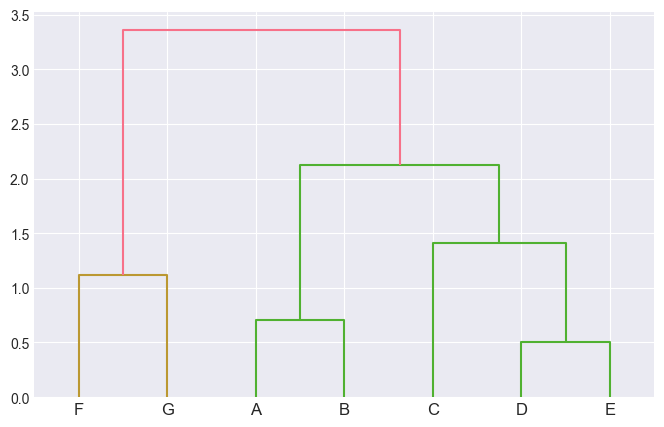


Clustering steps:
Step 1: Merge clusters at distance 0.500
Step 2: Merge clusters at distance 0.707
Step 3: Merge clusters at distance 1.118
Step 4: Merge clusters at distance 1.414
Step 5: Merge clusters at distance 2.121
Step 6: Merge clusters at distance 3.354


In [18]:
from scipy.spatial.distance import squareform

Z = linkage(squareform(distance_matrix), method='single')

plt.figure(figsize=(8, 5))
dendrogram(Z, labels=point_labels)
plt.show()

print("\nClustering steps:")
for i, step in enumerate(Z):
    print(f"Step {i+1}: Merge clusters at distance {step[2]:.3f}")


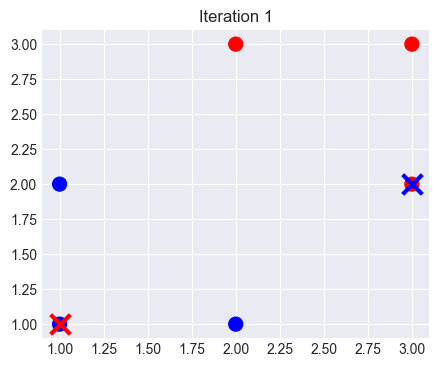

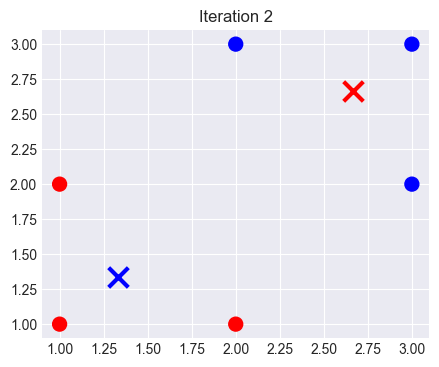

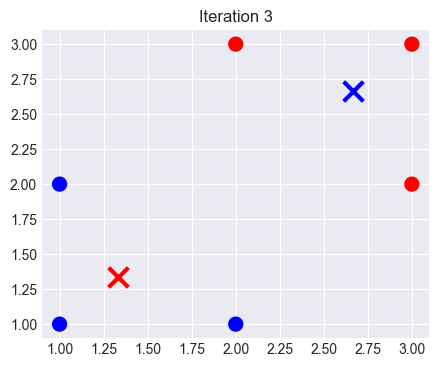

In [19]:
X_kmeans = np.array([
    [1, 1], [1, 2], [2, 1],
    [2, 3], [3, 2], [3, 3]
])

mu1 = np.array([1., 1.])
mu2 = np.array([3., 2.])

for iteration in range(3):
    distances_to_mu1 = np.linalg.norm(X_kmeans - mu1, axis=1)
    distances_to_mu2 = np.linalg.norm(X_kmeans - mu2, axis=1)
    assignments = (distances_to_mu1 < distances_to_mu2).astype(int) + 1
    
    plt.figure(figsize=(5, 4))
    colors = ['red' if a == 1 else 'blue' for a in assignments]
    plt.scatter(X_kmeans[:, 0], X_kmeans[:, 1], c=colors, s=100)
    plt.scatter(mu1[0], mu1[1], c='red', marker='x', s=200, linewidths=3)
    plt.scatter(mu2[0], mu2[1], c='blue', marker='x', s=200, linewidths=3)
    plt.title(f'Iteration {iteration + 1}')
    plt.show()
    
    cluster1_points = X_kmeans[assignments == 1]
    cluster2_points = X_kmeans[assignments == 2]
    
    new_mu1 = np.mean(cluster1_points, axis=0) if len(cluster1_points) > 0 else mu1
    new_mu2 = np.mean(cluster2_points, axis=0) if len(cluster2_points) > 0 else mu2
    
    if np.allclose(mu1, new_mu1) and np.allclose(mu2, new_mu2):
        print(f"Converged after {iteration + 1} iterations")
        break
    
    mu1, mu2 = new_mu1, new_mu2


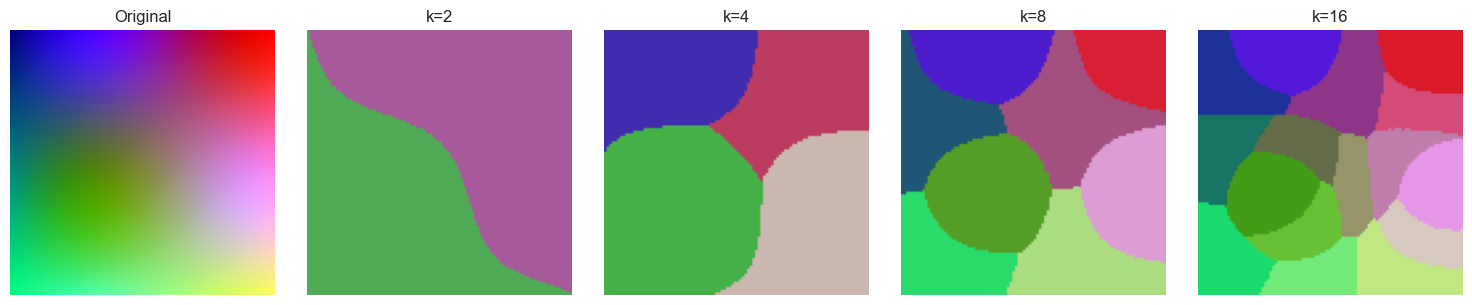

In [20]:
def kmeans_color_quantization(image, k):
    h, w, c = image.shape
    pixels = image.reshape(-1, 3)
    
    np.random.seed(42)
    centers = pixels[np.random.choice(len(pixels), k, replace=False)].astype(float)
    
    for _ in range(10):
        distances = np.array([np.linalg.norm(pixels - center, axis=1) for center in centers]).T
        assignments = np.argmin(distances, axis=1)
        
        new_centers = np.array([pixels[assignments == i].mean(axis=0) for i in range(k)])
        if np.allclose(centers, new_centers):
            break
        centers = new_centers
    
    quantized_pixels = centers[assignments]
    return quantized_pixels.reshape(h, w, c).astype(np.uint8), centers

# Create test image
size = 100
x, y = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))
original_image = np.stack([
    (255 * x).astype(np.uint8),
    (255 * y).astype(np.uint8),
    (255 * (0.5 + 0.5 * np.sin(5 * x) * np.cos(5 * y))).astype(np.uint8)
], axis=-1)

# Apply k-means
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
axes[0].imshow(original_image)
axes[0].set_title('Original')
axes[0].axis('off')

for i, k in enumerate([2, 4, 8, 16]):
    quantized_img, _ = kmeans_color_quantization(original_image, k)
    axes[i+1].imshow(quantized_img)
    axes[i+1].set_title(f'k={k}')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()
